In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [2]:
def get_stats(raw_stats):
  mean = np.mean(raw_stats, axis=0)
  std = np.std(raw_stats, axis=0)
  upper_bound = mean + 1.96 * std / np.sqrt(len(raw_stats))
  lower_bound = mean - 1.96 * std / np.sqrt(len(raw_stats))

  return mean, upper_bound, lower_bound

In [3]:
with open('/home/tahaf/spiking_mstp_low.json') as last_layer:
    last_layer_results = json.load(last_layer)

In [4]:
with open('/home/tahaf/spiking_mstp_low_dilated_5.json') as last_2_layer:
    last_2_layer_results = json.load(last_2_layer)

In [5]:
with open('/home/tahaf/spiking_mstp_low_full_dilated_5_accumulated.json') as all_layers:
    all_layers_results = json.load(all_layers)

In [6]:
with open('/home/tahaf/spiking_mstp_low_baseline.json') as baseline:
    baseline_results = json.load(baseline)

In [7]:
with open('/home/tahaf/spiking_mstp_low_full_dilated_3.json') as all_3:
    all_3_results = json.load(all_3)

In [8]:
with open('/home/tahaf/spiking_mstp_low_baseline_accumulated.json') as baseline_accumulated:
    base_acc = json.load(baseline_accumulated)

In [9]:
with open('/home/tahaf/dvs-runs/2024-03-19T01:49:45.647774/full_3_acc.json') as v1:
    v1_results = json.load(v1)

In [10]:
def plot_info(results1, results2, results3, results4, results5, results6, results7, info):
    info1 = results1[info]
    info2 = results2[info]
    info3 = results3[info]
    info4 = results4[info]
    info5 = results5[info]
    info6 = results6[info]
    info7 = results7[info]

    fig, ax = plt.subplots()
    ax.plot(info1, label='Last Layer, dilated kernel size = 7')
    ax.plot(info2, label='Last Two Layers, dilated kernel size = 5')
    ax.plot(info3, label='All Layers, dilated kernel size = 5')
    ax.plot(info4, label='Baseline')
    ax.plot(info5, label='All Layers, dilated kernel size = 3')
    ax.plot(info6, label='Baseline, accumulation')
    ax.plot(info7, label='V1 with Clamping')

    ax.set_title(info)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(info)
    plt.legend()
    plt.show()

In [11]:
last_layer_results.keys()

dict_keys(['train_losses', 'test_losses', 'train_accuracies', 'test_accuracies', 'best_epoch'])

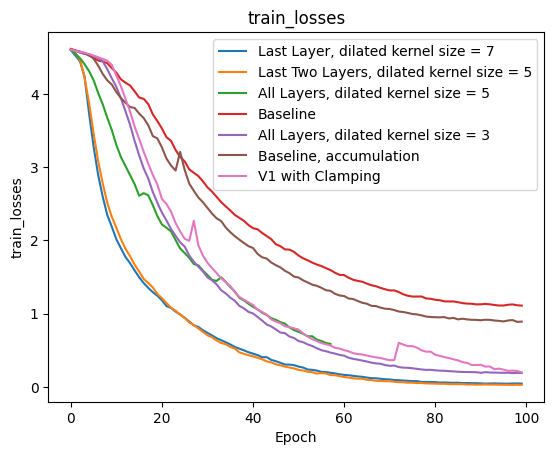

In [12]:
plot_info(last_layer_results, last_2_layer_results, all_layers_results, baseline_results, all_3_results, base_acc, v1_results, 'train_losses')

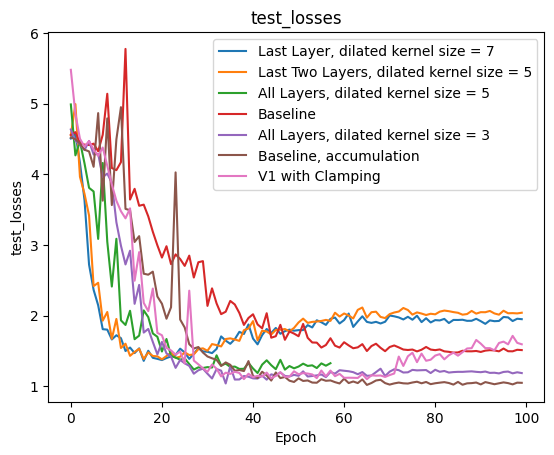

In [13]:
plot_info(last_layer_results, last_2_layer_results, all_layers_results, baseline_results, all_3_results, base_acc,v1_results, 'test_losses')

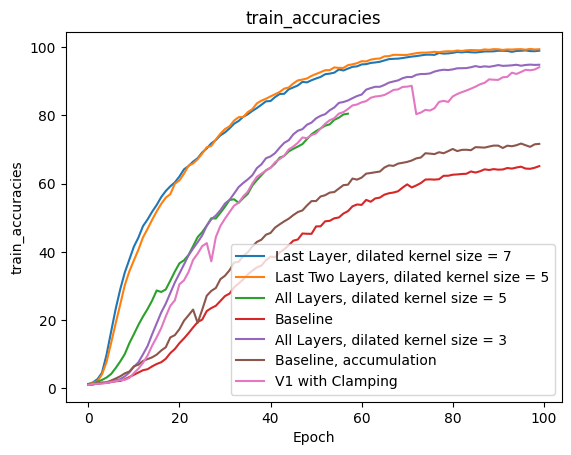

In [14]:
plot_info(last_layer_results, last_2_layer_results, all_layers_results, baseline_results, all_3_results, base_acc, v1_results, 'train_accuracies')

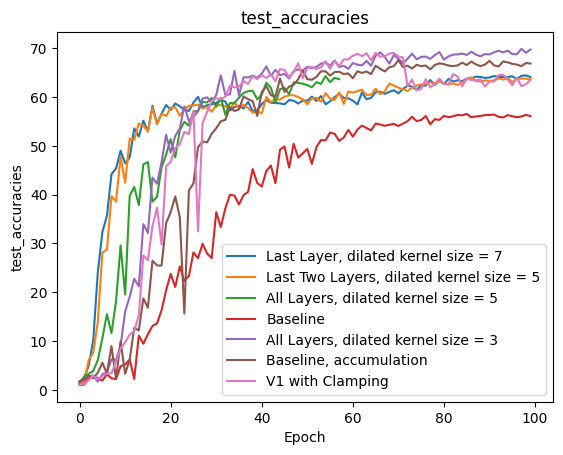

In [15]:
plot_info(last_layer_results, last_2_layer_results, all_layers_results, baseline_results, all_3_results, base_acc, v1_results, 'test_accuracies')

## Delays

In [16]:
import torch
import matplotlib.pyplot as plt

In [17]:
model = torch.load('/home/tahaf/dvs-runs/2024-03-19T01:49:45.647774/full_3_acc_best_model.pth', map_location='cpu')

In [18]:
model.keys()

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'spiking1.w', 'layer1.0.conv1.weight', 'layer1.0.conv1.P', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.spiking1.w', 'layer1.0.conv2.weight', 'layer1.0.conv2.P', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.spiking2.w', 'layer1.1.conv1.weight', 'layer1.1.conv1.P', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.spiking1.w', 'layer1.1.conv2.weight', 'layer1.1.conv2.P', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer1.1.spiking2.w', 'layer2.0.conv1.weight', 'layer2.0.conv1.P', '

In [19]:
positions = model['layer1.0.conv1.P'].flatten()

Text(0, 0.5, 'Frequency')

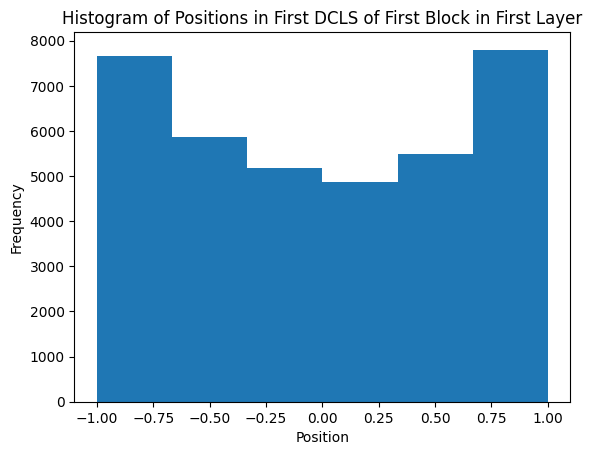

In [20]:
plt.hist(positions.numpy(), bins=6)
plt.title('Histogram of Positions in First DCLS of First Block in First Layer')
plt.xlabel('Position')
plt.ylabel('Frequency')

In [ ]:
import json

In [ ]:
with open('/home/tahaf/dvs-runs/2024-03-19T01:49:45.647774/full_3_acc.json', 'r') as f:
    a = json.load(f)

In [ ]:
len(a['train_accuracies'])